<a href="https://colab.research.google.com/github/oailnivek/ML100-Days/blob/master/homework/Day_083_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization, Activation
from keras.optimizers import SGD
import itertools

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 20s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        layer = Dense(units=n_units, activation='relu', name="hidden_layer"+str(i+1))
        x = layer(input_layer if i == 0 else x)
        x = BatchNormalization()(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = [32, 128, 256]
MOMENTUM = 0.95

In [0]:
def train(build_mlp):
    results = {}

    for batch_size in BATCH_SIZE:
        name = 'batch_size-' + str(batch_size)
        print(name)
        
        model = build_mlp(x_train.shape[1:])
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
        results[name] = model.fit(
            x_train,
            y_train,
            epochs=EPOCHS,
            batch_size=batch_size,
            validation_data=(x_test, y_test),
            shuffle=False,
            verbose=0
        )

    return results

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
Plot results
"""
def plot(results):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))    

    for name, history in results.items():
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        
        ax[0].plot(loss, linestyle='-', label=name)
        ax[0].plot(val_loss, linestyle='--', label=name)
        ax[0].set_xlabel('Epochs')
        ax[0].set_ylabel('Loss')
        ax[0].legend()
        
        ax[1].plot(acc, linestyle='-', label=name)
        ax[1].plot(val_acc, linestyle='--', label=name)
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Accuracy')
        ax[1].legend()

    plt.tight_layout()
    plt.show()


In [14]:
results = train(build_mlp)

batch_size-32
batch_size-128
batch_size-256


In [16]:
def build_mlp_2(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        layer = Dense(units=n_units, name="hidden_layer"+str(i+1))
        x = layer(input_layer if i == 0 else x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    return model

results_2 = train(build_mlp_2)

batch_size-32
batch_size-128
batch_size-256


In [18]:
def build_mlp_3(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        layer = Dense(units=n_units, activation='relu', name="hidden_layer"+str(i+1))
        x = layer(x)
    
    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    return model

results_3 = train(build_mlp_3)

batch_size-32
batch_size-128
batch_size-256


BN after activation


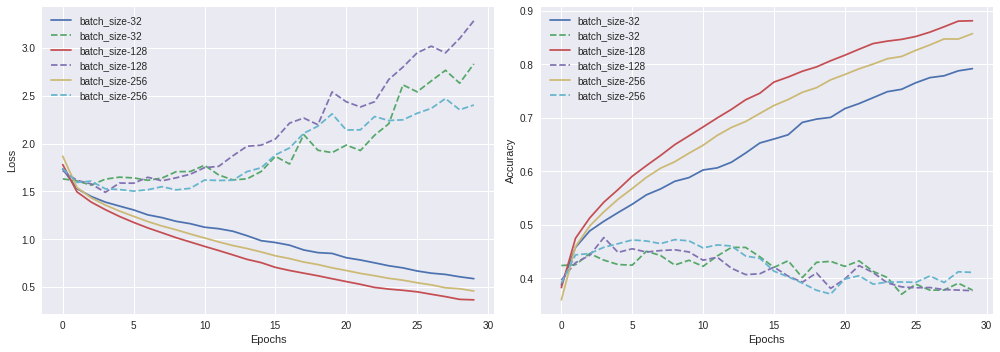

In [24]:
print('BN after activation')
plot(results)

BN before activation


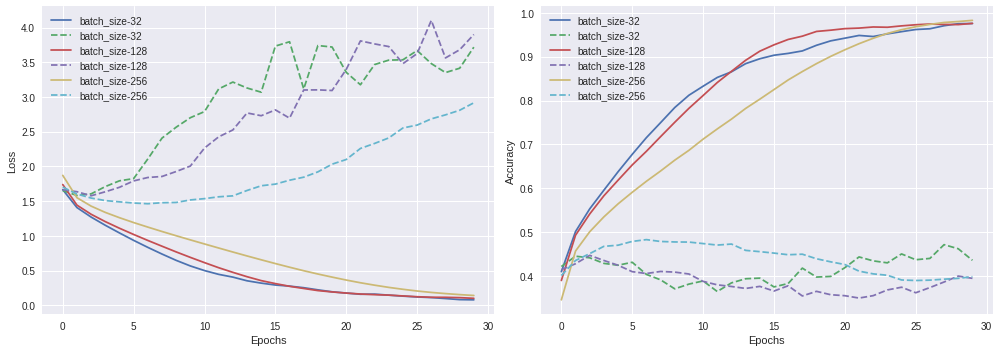

In [25]:
print('BN before activation')
plot(results_2)

BN after input layer


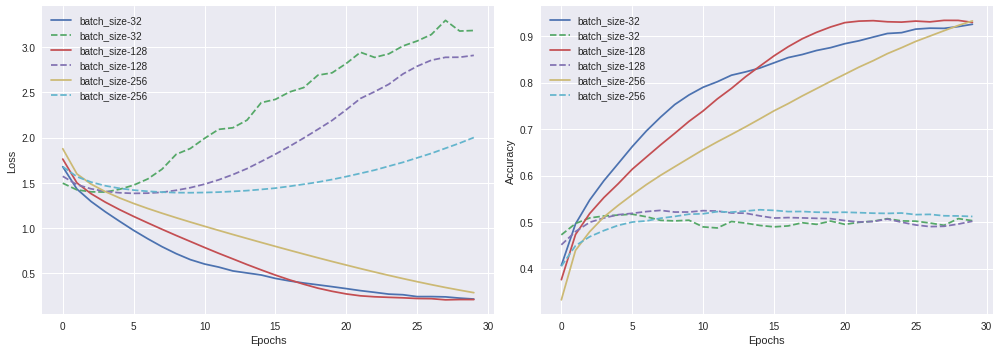

In [26]:
print('BN after input layer')
plot(results_3)